<a id='top'></a>
# Tavakaiv
An Exploration of the Pikes Peak Ascent and Marathon  
CSCI 4022 Advanced Data Science  
Fall 2019  
Mark Ivlev and Spencer Wegner

Links:  
[Data Cleaning](#data-cleaning) | 
[Clustering](#clustering)  |
[Preliminary Analysis](#prelim) |
[Exploratory Data Analysis](#eda)

<a id='data-cleaning'></a>
[Back to Top](#top)
### Data Cleaning

#### Notes:
- Figure out how to extract points from K-Means clusters

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#df = pd.read_csv("/Users/spencerwegner/Documents/School/4th Year/fall-2019/csci-4022-data-science/project/tavakaiv/pikes_peak_results.csv")
df = pd.read_csv("/Users/Mark Ivlev/Documents/GitHub/tavakaiv/pikes_peak_results.csv")
# drop name information
df=df.drop(columns='First')
df=df.drop(columns='Mi')
df=df.drop(columns='Last')

In [3]:
# update column types (convert times to strings for next step)
df = df.astype({'Pos': 'float', 'Div': 'str', 'Mpos': 'float', 'Mdiv': 'str', 'Sex': 'str', 'Age': 'float', \
                'Grp': 'str', 'City': 'str', 'State': 'str', 'NNup': 'str', 'BCupSplit': 'str', 'BCup': 'str', \
                'AFupSplit': 'str', 'AFup': 'str', 'AscSplit': 'str', 'Asc': 'str', 'AFdwnSplit': 'str', \
                'AFdwn': 'str', 'BCdwnSplit': 'str', 'BCdwn': 'str', 'NNdwnSplit': 'str', 'NNdwn': 'str', \
                'DwnSplit': 'str', 'Dwn': 'str', 'Mar': 'str', 'Race': 'str'})

In [4]:
# convert times (strings) to datetime type
df['NNup'] = pd.to_datetime(df['NNup'], format='%H:%M:%S')
df['BCupSplit'] = pd.to_datetime(df['BCupSplit'], format='%H:%M:%S')
df['BCup'] = pd.to_datetime(df['BCup'], format='%H:%M:%S')
df['AFupSplit'] = pd.to_datetime(df['AFupSplit'], format='%H:%M:%S')
df['AFup'] = pd.to_datetime(df['AFup'], format='%H:%M:%S')
df['AscSplit'] = pd.to_datetime(df['AscSplit'], format='%H:%M:%S')
df['Asc'] = pd.to_datetime(df['Asc'], format='%H:%M:%S')
df['AFdwnSplit'] = pd.to_datetime(df['AFdwnSplit'], format='%H:%M:%S')
df['AFdwn'] = pd.to_datetime(df['AFdwn'], format='%H:%M:%S')
df['BCdwnSplit'] = pd.to_datetime(df['BCdwnSplit'], format='%H:%M:%S')
df['BCdwn'] = pd.to_datetime(df['BCdwn'], format='%H:%M:%S')
df['NNdwnSplit'] = pd.to_datetime(df['NNdwnSplit'], format='%H:%M:%S')
df['NNdwn'] = pd.to_datetime(df['NNdwn'], format='%H:%M:%S')
df['DwnSplit'] = pd.to_datetime(df['DwnSplit'], format='%H:%M:%S')
df['Dwn'] = pd.to_datetime(df['Dwn'], format='%H:%M:%S')
df['Mar'] = pd.to_datetime(df['Mar'], format='%H:%M:%S')

In [5]:
# convert time to seconds
def time_seconds(hours, minutes, seconds):
    return 3600*hours + 60*minutes + seconds

# use lambda and apply to update time columns with seconds (takes a minute or so to run)
df['NNup'] = df.apply(lambda x: time_seconds(x['NNup'].hour, x['NNup'].minute, x['NNup'].second), axis=1)
df['BCupSplit'] = df.apply(lambda x: time_seconds(x['BCupSplit'].hour, x['BCupSplit'].minute, x['BCupSplit'].second), axis=1)
df['BCup'] = df.apply(lambda x: time_seconds(x['BCup'].hour, x['BCup'].minute, x['BCup'].second), axis=1)
df['AFupSplit'] = df.apply(lambda x: time_seconds(x['AFupSplit'].hour, x['AFupSplit'].minute, x['AFupSplit'].second), axis=1)
df['AFup'] = df.apply(lambda x: time_seconds(x['AFup'].hour, x['AFup'].minute, x['AFup'].second), axis=1)
df['AscSplit'] = df.apply(lambda x: time_seconds(x['AscSplit'].hour, x['AscSplit'].minute, x['AscSplit'].second), axis=1)
df['Asc'] = df.apply(lambda x: time_seconds(x['Asc'].hour, x['Asc'].minute, x['Asc'].second), axis=1)
df['AFdwnSplit'] = df.apply(lambda x: time_seconds(x['AFdwnSplit'].hour, x['AFdwnSplit'].minute, x['AFdwnSplit'].second), axis=1)
df['AFdwn'] = df.apply(lambda x: time_seconds(x['AFdwn'].hour, x['AFdwn'].minute, x['AFdwn'].second), axis=1)
df['BCdwnSplit'] = df.apply(lambda x: time_seconds(x['BCdwnSplit'].hour, x['BCdwnSplit'].minute, x['BCdwnSplit'].second), axis=1)
df['BCdwn'] = df.apply(lambda x: time_seconds(x['BCdwn'].hour, x['BCdwn'].minute, x['BCdwn'].second), axis=1)
df['NNdwnSplit'] = df.apply(lambda x: time_seconds(x['NNdwnSplit'].hour, x['NNdwnSplit'].minute, x['NNdwnSplit'].second), axis=1)
df['NNdwn'] = df.apply(lambda x: time_seconds(x['NNdwn'].hour, x['NNdwn'].minute, x['NNdwn'].second), axis=1)
df['DwnSplit'] = df.apply(lambda x: time_seconds(x['DwnSplit'].hour, x['DwnSplit'].minute, x['DwnSplit'].second), axis=1)
df['Dwn'] = df.apply(lambda x: time_seconds(x['Dwn'].hour, x['Dwn'].minute, x['Dwn'].second), axis=1)
df['Mar'] = df.apply(lambda x: time_seconds(x['Mar'].hour, x['Mar'].minute, x['Mar'].second), axis=1)

In [6]:
df.head() # DataFrame with both ascent and marathon racers

,ID,Pos,Div,Mpos,Mdiv,PPs,Sex,Age,Grp,City,...,AFdwn,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year
0,79698,410.0,67/77,NaN,nan,1,F,34.0,30-34,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2011
1,110626,257.0,40/132,NaN,nan,1,M,34.0,30-34,LAKEWOOD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2017
2,75566,891.0,86/102,NaN,nan,1,M,29.0,25-29,SAN ANTONIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009
3,70663,414.0,69/83,NaN,nan,2,F,39.0,35-39,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2007
4,74588,397.0,49/63,NaN,nan,2,F,41.0,40-44,COLORADO SPGS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2009


In [7]:
# list of values to drop from Div and Mdiv columns
drop_list = ['',' ','?','DNF','DNF-11m','DNF-12+','DNF-3','DNF-4m','DNF-7m','DNF-8m','DNF-<AF','DNF-<BC',\
             'DNF-<BP','DNF-<BR','DNF-<NN','DNF->AF','DNF->BC','DNF-AF','DNF-AF+','DNF-BC','DNF-BC+',\
             'DNF-BP','DNF-BR','DNF-COG','DNF-CQ','DNF-FX','DNF-HR','DNF-INC','DNF-IO','DNF-NN','DNF-NN+',\
             'DNF-OCO','DNF-OCT','DNF-R','DNF-RX','DNF-SMK','DNF-ST','DNF-TMS','DNF-TOP','DNF-Top','DNF-UR',\
             'DNF-WET','DNF-Ws','DQ','DQ-AF','DQ-BC','DQ-SWAP','DQ-US','DQ-WAVE','DQ-Wave','DQed','nan']

In [8]:
# drop age group 1-15, any values from 'drop_list' in Div and Mdiv (placement) columns
for index, row in df.iterrows():
    if row['Grp'] == '01-15':
        df.drop(index, inplace=True)
    elif row['Race'] == 'A' and row['Div'] in drop_list:
        df.drop(index, inplace=True)
    elif row['Race'] == 'M' and row['Mdiv'] in drop_list:
        df.drop(index, inplace=True)

In [9]:
# create dataframe for ascent races
dfA = df[df.Race=='A']
dfA = dfA.drop(columns = ['AFdwnSplit', 'AFdwn', 'BCdwnSplit', 'BCdwn', 'NNdwnSplit', 'NNdwn', 'DwnSplit', \
                         'Dwn', 'Mar', 'Mpos', 'Mdiv'])
# create dataframe for marathon races
dfM = df[df.Race=='M']
dfM = dfM.drop(columns = ['Pos', 'Div'])

In [10]:
# take first part of placement before '/'
def parse_div(div):
    return div.split('/')[0]

In [11]:
# add columns for age group placement from first part of Div/Mdiv columns
dfA['Div_place'] = dfA.apply(lambda x: parse_div(x['Div']), axis=1)
dfM['Mdiv_place'] = dfM.apply(lambda x: parse_div(x['Mdiv']), axis=1)

In [12]:
dfA.head() # DF with only ascent racers

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,BCupSplit,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place
0,79698,410.0,67/77,1,F,34.0,30-34,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19868.0,A,2011,67
1,110626,257.0,40/132,1,M,34.0,30-34,LAKEWOOD,CO,NaN,NaN,6734.0,3123.0,9857.0,4379.0,14236.0,A,2017,40
2,75566,891.0,86/102,1,M,29.0,25-29,SAN ANTONIO,TX,NaN,NaN,NaN,NaN,NaN,NaN,17868.0,A,2009,86
3,70663,414.0,69/83,2,F,39.0,35-39,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,20781.0,A,2007,69
4,74588,397.0,49/63,2,F,41.0,40-44,COLORADO SPGS,CO,NaN,NaN,NaN,NaN,NaN,NaN,19931.0,A,2009,49


In [13]:
dfM.head() # DF with only marathon racers

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,BCdwnSplit,BCdwn,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place
12,111562,170.0,15/17,3,F,55.0,55-59,COLORADO SPRING,CO,5555.0,...,NaN,28728.0,NaN,NaN,NaN,13485.0,35225.0,M,2017,15
13,79048,402.0,51/70,1,M,52.0,50-54,CORAL SPRINGS,FL,NaN,...,NaN,NaN,NaN,NaN,NaN,11036.0,29031.0,M,2010,51
19,44930,164.0,54/101,3,M,31.0,30-34,AUSTIN,TX,NaN,...,NaN,NaN,NaN,NaN,NaN,7095.0,19276.0,M,1981,54
20,48926,197.0,56/108,3,M,32.0,30-34,WESTFORD,MA,NaN,...,NaN,NaN,NaN,NaN,NaN,7585.0,20372.0,M,1982,56
24,114099,14.0,3/79,3,M,35.0,35-39,BOULDER,CO,2783.0,...,1230.0,12965.0,1536.0,14501.0,1597.0,5981.0,16098.0,M,2018,3


<a id='clustering'></a>
### Clustering

In [14]:
# Ascent
# add score column to dfM
dfA['ag_score'] = np.nan
dfA['g_score'] = np.nan

# compute age group score = fastest AG Asc time / Asc time (1 for first in AG)
# compute gender score = fastest G Asc time / Asc time (1 for first place man/woman)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    # age group score
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Grp'] == ag) & (dfA['Sex'] == sex)]
            try:
                best_time = min(dfT['Asc'])
            except ValueError: # nobody in AG
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Asc']
                dfA.loc[index, 'ag_score'] = score
    # gender score          
    for sex in ['M', 'F']:
        dfT = dfA.loc[(dfA['Year'] == year) & (dfA['Sex'] == sex)]
        try:
            best_time = min(dfT['Asc'])
        except ValueError:
            continue
        for index, row in dfT.iterrows():
            score = best_time/row['Asc']
            dfA.loc[index, 'g_score'] = score

In [15]:
# Marathon
# add score column to dfM
dfM['ag_score'] = np.nan
dfM['g_score'] = np.nan

# compute age group score = fastest AG Mar time / Mar time (1 for first in AG)
# compute gender score = fastest G Mar time / Mar time (1 for first place man/woman)
age_groups = ['30-34', '25-29', '35-39', '40-44', '20-24', '45-49', '50-54', '55-59', '60-64', \
              '16-19', '65-69', '70-74', '75-79','80-84', '85-89']
for year in range(1956, 2019):
    # age group score
    for ag in age_groups:
        for sex in ['M', 'F']:
            # create temporary DataFrame
            dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Grp'] == ag) & (dfM['Sex'] == sex)]
            try:
                best_time = min(dfT['Mar'])
            except ValueError: # nobody in AG
                continue
            for index, row in dfT.iterrows():
                score = best_time/row['Mar']
                dfM.loc[index, 'ag_score'] = score
    # gender score          
    for sex in ['M', 'F']:
        dfT = dfM.loc[(dfM['Year'] == year) & (dfM['Sex'] == sex)]
        try:
            best_time = min(dfT['Mar'])
        except ValueError:
            continue
        for index, row in dfT.iterrows():
            score = best_time/row['Mar']
            dfM.loc[index, 'g_score'] = score 

In [16]:
# drop NaN's in score column for ascent
for index, row in dfA.iterrows():
    if np.isnan(row['ag_score']):
        dfA.drop(index, inplace=True)
    elif np.isnan(row['g_score']):
        dfA.drop(index, inplace=True)

In [17]:
dfA = dfA.astype({'Div_place': 'float'})

In [18]:
# clean out age groups and entire genders where there is missing data and age group and gender scores are inflated
for index, row in dfA.iterrows():
    if row['ag_score'] == 1 and row['Div_place'] != 1:
        dfT = dfA.loc[(dfA['Year'] == row['Year']) & (dfA['Grp'] == row['Grp']) & (dfA['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfA.drop(idx, inplace=True)
            except KeyError:
                continue
    elif row['g_score'] == 1 and row['Pos'] != 1:
        dfT = dfA.loc[(dfA['Year'] == row['Year']) & (dfA['Grp'] == row['Grp']) & (dfA['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfA.drop(idx, inplace=True)
            except KeyError:
                continue

In [19]:
# drop NaN's in score column for marathon
for index, row in dfM.iterrows():
    if np.isnan(row['ag_score']):
        dfM.drop(index, inplace=True)
    elif np.isnan(row['g_score']):
        dfM.drop(index, inplace=True)
    elif row['Mdiv_place'] == '': # extra case for empty string in 'Mdiv_place'
        dfM.drop(index, inplace=True)

In [20]:
dfM = dfM.astype({'Mdiv_place': 'float'})

In [21]:
# clean out age groups and entire genders where there is missing data and age group and gender scores are inflated
for index, row in dfM.iterrows():
    if row['ag_score'] == 1 and row['Mdiv_place'] != 1:
        dfT = dfM.loc[(dfM['Year'] == row['Year']) & (dfM['Grp'] == row['Grp']) & (dfM['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfM.drop(idx, inplace=True)
            except KeyError:
                continue
    elif row['g_score'] == 1 and row['Mpos'] != 1:
        dfT = dfM.loc[(dfM['Year'] == row['Year']) & (dfM['Grp'] == row['Grp']) & (dfM['Sex'] == row['Sex'])]
        for idx, r in dfT.iterrows():
            try:
                dfM.drop(idx, inplace=True)
            except KeyError:
                continue

#### K-Means

In [150]:
a1=np.array(dfA['ag_score'])
a2=np.array(dfA['g_score'])
A=np.vstack((a1, a2)).T    
    
kmeans = KMeans(n_clusters=5).fit_predict(A)
cents = KMeans(n_clusters=5).fit(A)
centers = cents.cluster_centers_

In [153]:
indices=[]
clstr_number=kmeans[5]
for i in range(len(kmeans)):
    if kmeans[i]==clstr_number:
        indices.append(i)
dfBCA=dfA.iloc[indices]
dfBCA.head()

,ID,Pos,Div,PPs,Sex,Age,Grp,City,State,NNup,...,BCup,AFupSplit,AFup,AscSplit,Asc,Race,Year,Div_place,ag_score,g_score
5,102608,18.0,2/34,1,M,23.0,20-24,MARAVATÍO,MEX,2329.0,...,4081.0,1825.0,5906.0,2833.0,8740.0,A,2014,2.0,0.941419,0.892792
23,105138,17.0,4/124,3,M,32.0,30-34,BOULDER,CO,2681.0,...,4719.0,2270.0,6989.0,3091.0,10081.0,A,2015,4.0,0.807658,0.807658
106,50550,32.0,1/18,13,F,48.0,45-49,AURORA,CO,NaN,...,NaN,NaN,NaN,NaN,13318.0,A,1983,1.0,1.000000,0.719628
107,37528,50.0,2/15,13,F,49.0,45-49,AURORA,CO,NaN,...,NaN,NaN,NaN,NaN,14075.0,A,1984,2.0,0.980604,0.722629
108,27184,49.0,1/14,13,F,50.0,50-54,AURORA,CO,NaN,...,NaN,NaN,NaN,NaN,13827.0,A,1985,1.0,1.000000,0.700441


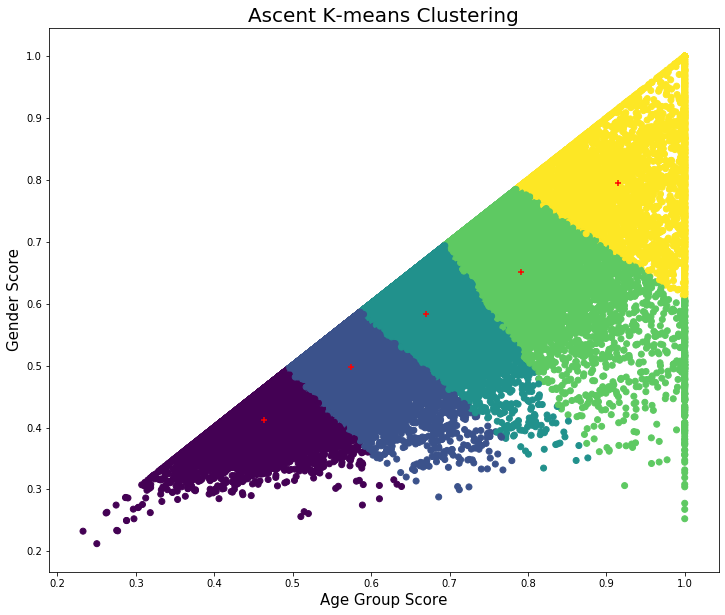

In [140]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in A], [x[1] for x in A], c=kmeans)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c='red', marker='+')
ax.set_title('Ascent K-means Clustering', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

In [160]:
m1=np.array(dfM['ag_score'])
m2=np.array(dfM['g_score'])
M=np.vstack((m1, m2)).T
    
kmeansM = KMeans(n_clusters=5).fit_predict(M)
centsM = KMeans(n_clusters=5).fit(M)
centersM = centsM.cluster_centers_

In [162]:
indices=[]
clstr_number=kmeansM[4]
for i in range(len(kmeansM)):
    if kmeansM[i]==clstr_number:
        indices.append(i)
dfBCM=dfM.iloc[indices]
dfBCM.head()

,ID,Mpos,Mdiv,PPs,Sex,Age,Grp,City,State,NNup,...,NNdwnSplit,NNdwn,DwnSplit,Dwn,Mar,Race,Year,Mdiv_place,ag_score,g_score
24,114099,14.0,3/79,3,M,35.0,35-39,BOULDER,CO,2783.0,...,1536.0,14501.0,1597.0,5981.0,16098.0,M,2018,3.0,0.850292,0.791403
38,114097,12.0,2/79,1,M,36.0,35-39,WOODLAND PARK,CO,2683.0,...,13543.0,13543.0,1417.0,5429.0,14960.0,M,2018,2.0,0.914973,0.851604
189,35885,4.0,1/62,1,M,34.0,30-34,PEMBROKE PINES,FL,NaN,...,NaN,NaN,NaN,6201.0,15668.0,M,2000,1.0,1.000000,0.899030
281,17030,34.0,6/118,24,M,40.0,40-44,TETON VILLAGE,WY,NaN,...,NaN,NaN,NaN,5748.0,17026.0,M,1992,6.0,0.890990,0.720369
283,12649,22.0,3/101,24,M,42.0,40-44,TETON VILLAGE,WY,NaN,...,NaN,NaN,NaN,5804.0,17119.0,M,1994,3.0,0.828203,0.753782


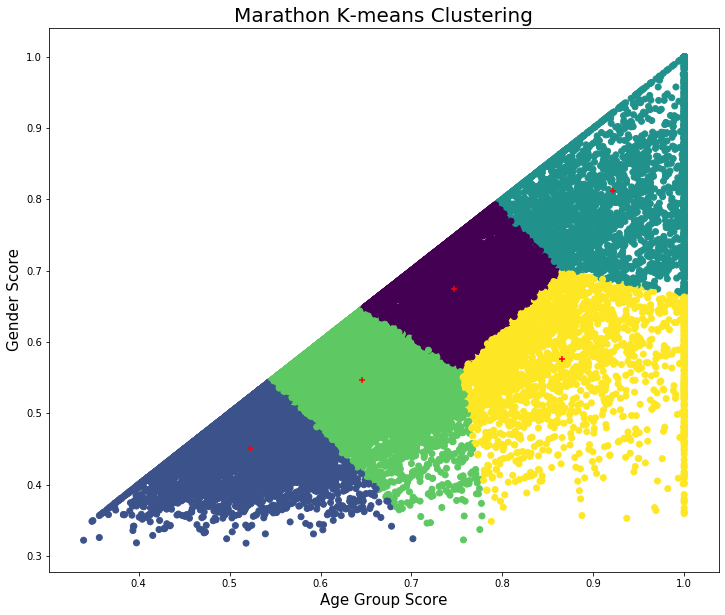

In [25]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
plt.scatter([x[0] for x in M], [x[1] for x in M], c=kmeansM)
plt.scatter([x[0] for x in centersM], [x[1] for x in centersM], c='red', marker='+')
ax.set_title('Marathon K-means Clustering', size=20)
plt.xlabel("Age Group Score", size=15)
plt.ylabel("Gender Score", size=15)
plt.show()

<a id='prelim'></a>
[Back to Top](#top)
### Preliminary Analysis

#### Data
The data set contains nearly 87,000 race results from 1956-2018. However, only races from 2012-2018 include data on split locations. So far we have dropped about 4,000 of the 87,000 rows due to missing data. We split the original DataFrame into two different DataFrames, one for the Ascent races and one for the Marathon races. We converted the split times from the hours:minutes:seconds format to seconds to make calculations easier.   

Instead of comparing the race times directly which would favor men and younger people, we added two score columns that represent how the runner did relative to their age group and how they did relative to their gender. For the age group score, we divided the best time in the age group by each runner's time so the runner who was first place in the age group got a score of 1 and other runners got a score less than 1. The same technique was used for the gender score.

#### Analysis

We chose to cluster the data to identify a group of races that are "successful", meaning they are run well for the age and gender of the runner. We do not merely want to choose the fastest times because that would bias successful races to men and younger people. For example, if the 10th place man was the same age as the first place man, the first place man obviously ran the race better. The 10th place man shouldn't be included just because his time is faster than the first place woman.  

We used K-means to cluster the race data based on the calculated gender and age group scores. This produced a group of races that are succesful (the upper right portion of the graph where both gender and age group score are close to 1). We chose K-means as the clustering algorithm so we can control the initialization of the clusters. This preliminary clustering gives us a group of races on which to perform a linear regression and perform further exploratory data analysis. This will allow us to determine if there is an optimal way to run the races. 

#### Pending Work
We will continue to play with the k-means initialization to see if we get different results. We need to do more data cleaning because we discovered there is missing data which inflates the age group scores of some runners incorrectly. Then we need to take the cluster of successful races and choose the races with split times and begin to analyze those. We will look at the percentage of time those runners are spending between all of the split locations to determine the optimal way to run the race.

<a id='eda'></a>
[Back to Top](#top)
### Exploratory Data Analysis

In [26]:
dfA_eda = dfA.loc[(dfA['g_score'] >= 0.8) & (dfA['ag_score'] >= 0.8)]
dfA_eda_splits = dfA.loc[(dfA['g_score'] >= 0.8) & (dfA['ag_score'] >= 0.8) & (dfA['Year'] >= 2013)]
dfM_eda = dfM.loc[(dfM['g_score'] > 0.8) & (dfM['ag_score'] >= 0.8)]
dfM_eda_splits = dfM.loc[(dfM['g_score'] > 0.8) & (dfM['ag_score'] >= 0.8) & (dfM['Year'] >= 2013)]

Calculate the percentage of downhill time to the uphill time for the marathon.

In [27]:
dfM_eda['dwn_pct_asc'] = dfM_eda['Dwn']/dfM_eda['Asc']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
dfM_eda['dwn_pct_asc'] = np.nan
for index, row in dfM_eda.iterrows():
    dfM_eda.loc[index, 'dwn_pct_asc'] = row['Dwn']/row['Asc']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
